# Tarea 2

Jhon Wilmer Pino Román  
1017269052  
Curso: Ecuaciones Diferenciales II  
Profesor: Carlos Piedrahita  
Computación Científica - Facultad de Ciencias Básicas  
Universidad de Medellín - 2022-2

## **Ejercicio 4.6**  
Dada la ecuación diferencial:

$$ - \frac{d}{dx} \left( -4 \frac{du}{dx} \right) + 8\frac{du}{dx} + 5u = (\sin{x} + 8\cos{x}), \quad -\pi < x < \pi $$

con condición de frontera natural de Neumann:

$$ -4 \frac{du}{dx} = -20, \quad x=-\pi $$

Y de Dirichlet:

$$ u_b=2, \quad x=\pi $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Ab_local(xk1, xk, p, q, r, f):
  Alocal = np.zeros((2, 2)); blocal = np.zeros((2))
  h = xk1 - xk
  xm = [ 0.5*(1-np.sqrt(3/5)), 0.5, 0.5*(1+np.sqrt(3/5)) ]
  wm = [5/18, 4/9, 5/18]
  phik = lambda X: 1-X
  phik1 = lambda X: X
  philist = [phik, phik1]
  dphisX = [-1, 1]; sa=0; sb=0
  for i in range(2):
    for j in range(2):
      for m in range(len(xm)):
        sa += wm[m]*( (1/h**2)*p(xk + h*xm[m])*dphisX[i]*dphisX[j] + (1/h)*q(xk + h*xm[m])*philist[i](xm[m])*dphisX[j] + r(xk + h*xm[m])*philist[i](xm[m])*philist[j](xm[m]) )
      Alocal[i,j] = h*sa
      sa = 0
    for m2 in range(len(xm)):
      sb += wm[m2]*f(xk + h*xm[m2])*philist[i](xm[m2])
    blocal[i] = h*sb
    sb = 0

  return Alocal, blocal



def linear_fem(N, x, px, qx, rx, fx, ua='NaN', ub='NaN', eta_a=0, eta_b=0, alpha=0):
  AG = np.zeros((N+1, N+1))
  b = np.zeros((N+1))
  i=0


  while i < N:
    Al, bl = Ab_local(x[i+1], x[i], px, qx, rx, fx)
    AG[i:i+2, i:i+2] = AG[i:i+2, i:i+2] + Al
    b[i:i+2] = b[i:i+2] + bl
    i+=1


  if ua != 'NaN':
    AG[0,0] = 1; AG[0,1:] = 0
    b[0] = ua
  if ub != 'NaN':
    AG[N,0:N] = 0; AG[N,N] = 1
    b[N] = ub

  b[0] = b[0] + eta_a
  b[N] = b[N] + eta_b
  AG[N,N] = AG[N,N] + alpha

  return np.linalg.solve(AG, b)

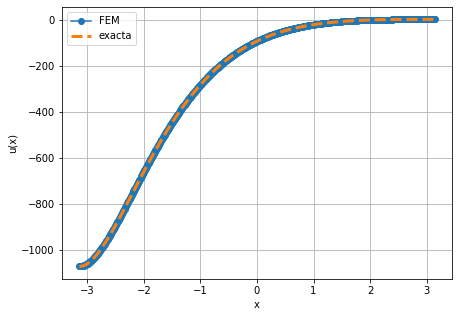

In [ ]:
# Elementos y malla
N1 = 1000
x1 = np.linspace(-np.pi, np.pi, N1+1)

# Funciones
px = lambda x: -4
qx = lambda x: 8
rx = lambda x: 5
fx = lambda x: np.sin(x) + 8*np.cos(x)
ub = 2
eta_a = 0

# solucion por elementos finitos
U1 = linear_fem(N1, x1, px, qx, rx, fx, ub=ub, eta_a=eta_a)

# solucion exacta
x2 = np.linspace(-np.pi, np.pi, 1001)
analitica = lambda x: 2*np.exp(-x)*( np.exp(np.pi)*np.sin(x/2) + ((1-2*np.exp(2*np.pi))/(np.exp(np.pi)))*np.cos(x/2) ) + np.sin(x)

fig = plt.figure(figsize=(7,5))
plt.plot(x1, U1, '-o', label='FEM')
plt.plot(x2, analitica(x2),'--',linewidth=3,  label='exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid()
plt.show()

## Cálculo del Error

In [ ]:
U0 = list()
for i in x2:
  U0.append(analitica(i))

U2 = np.array(U0)


In [ ]:
U = U1-U2
A = np.linalg.norm(U)
B = np.linalg.norm(U2)
error = (A/B)*100
error

0.0013158691195367396